### Import

In [65]:
import os
import torch
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from torch.autograd import Variable

### Create Data

In [66]:
bias = 50.0
noise = 10.0
x_train,y_train,coef = make_regression(n_samples = 100,
                           n_features = 1,
                           n_informative = 1,
                           n_targets = 1,
                           bias = bias,
                           effective_rank = None,
                           noise = noise,
                           shuffle = True,
                           coef = True,
                           random_state = 42)
x_train = np.array(x_train, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

### Plot the Data

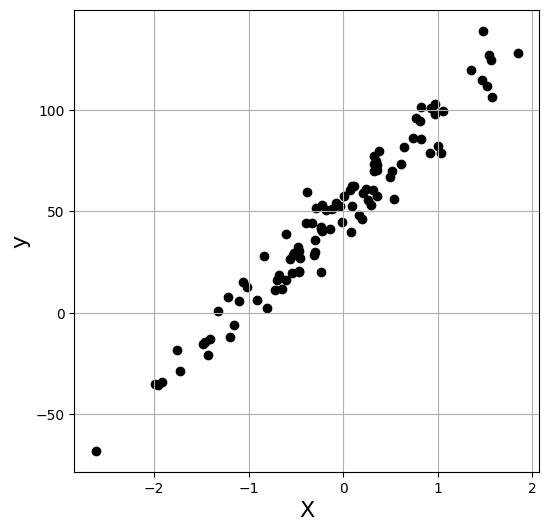

In [67]:
plt.figure(figsize=(6,6))
plt.scatter(x_train,y_train,c='k')
plt.grid();
plt.xlabel('X',fontsize=16);
plt.ylabel('y',fontsize=16);

### Convert to torch Tensor

In [68]:
inputs = Variable(torch.from_numpy(x_train))
labels = Variable(torch.from_numpy(y_train))

#inputs = Variable(torch.from_numpy(x_train).cuda())
#labels = Variable(torch.from_numpy(y_train).cuda())

### Create Linear Regresion Class Model

In [69]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

### Parameters

In [70]:
inputDim = 1
outputDim = 1
learningRate = 0.01 
epochs = 1000

### Instantiate Model

In [71]:
model = linearRegression(inputDim, outputDim)

### Optimizer parameters

In [72]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Start Training

In [73]:
loss_history = []
for epoch in range(epochs):

    #Clear gradient buffers
    optimizer.zero_grad()

    #Get output from the model, given the inputs
    outputs = model(inputs)

    #Get loss for the predicted output
    loss = criterion(outputs, labels)
    loss_history.append(loss.item())

    #Get gradients w.r.t to parameters
    loss.backward()

    #Update parameters
    optimizer.step()

    #Print
    if (epoch % 100 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 3762.062744140625
epoch 100, loss 216.2650604248047
epoch 200, loss 83.73417663574219
epoch 300, loss 78.2959213256836
epoch 400, loss 78.06466674804688
epoch 500, loss 78.05469512939453
epoch 600, loss 78.05426025390625
epoch 700, loss 78.05424499511719
epoch 800, loss 78.05423736572266
epoch 900, loss 78.05425262451172


### Plot Loss

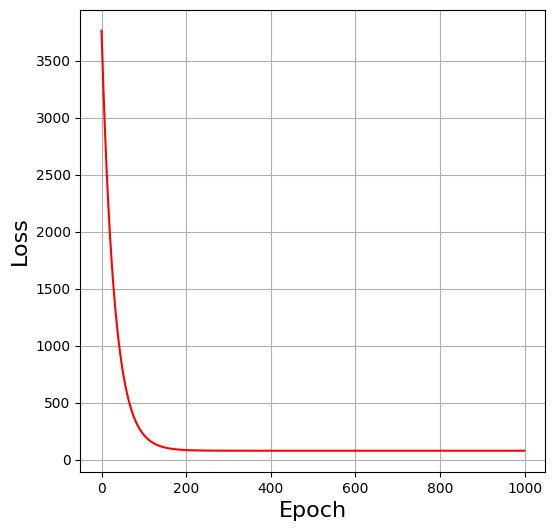

In [75]:
loss_history = np.array(loss_history)
plt.figure(figsize=(6,6))
plt.plot(loss_history,'r')
plt.grid();
plt.xlabel('Epoch',fontsize=16);
plt.ylabel('Loss',fontsize=16);

### Predict

In [76]:
x_val = np.linspace(np.min(x_train),np.max(x_train),100)
x_val = np.array(x_val, dtype=np.float32)
x_val = x_val.reshape(-1, 1)
with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(x_val))).data.numpy()

### Get Parameters and compare with actual coefficients

In [77]:
for name,param in model.named_parameters():
    if 'weight' in name:
        w = param[0].detach().numpy()
    if 'bias' in name:
        b = param[0].detach().numpy()        
print(w,b)
print(coef,bias)

[44.437042] 51.16501
41.7411003148779 50.0


### Print Result

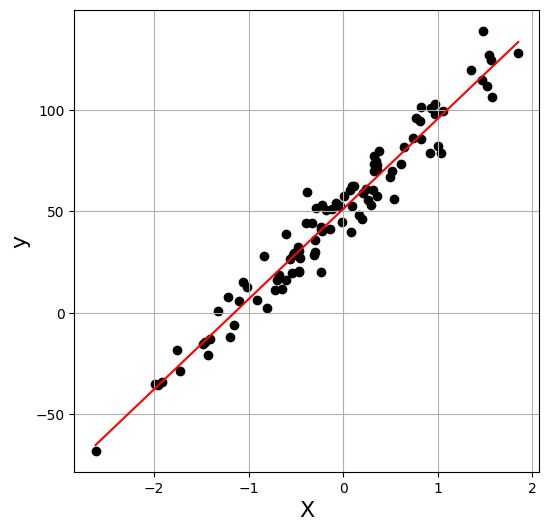

In [78]:
plt.figure(figsize=(6,6))
plt.scatter(x_train,y_train,c='k')
plt.plot(x_val,predicted,'r')
plt.grid();
plt.xlabel('X',fontsize=16);
plt.ylabel('y',fontsize=16);